In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
import os
from skimage.transform import rescale, resize
from skimage.feature import hog

In [4]:
class ImagePreProcessor:
    def __init__(self, path:str):
        self.path = path
    
    def transform(self):
        image = io.imread(self.path, as_gray=True)
        rescaled_image = rescale(image, 1/3)
        resized_image = resize(rescaled_image, (228,228))
        hog_feature = hog(resized_image)
        return np.array([hog_feature])


In [5]:
p_image = ImagePreProcessor(r'data\Brown_spot\DSC_0301.JPG')
p_image.transform().shape

(1, 54756)

In [6]:
folders = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
image_vectors = []
Labels = []
for d in folders:
    label = folders.index(d)
    for file in os.listdir(f'data\\{d}'):
        image = io.imread(f'data\\{d}\\{file}', as_gray=True)
        for scaler in [1/2, 1/3]:
            rescaled_image = rescale(image, scaler)
            resized_image = resize(rescaled_image, (228,228))
            hog_feature = hog(resized_image)
            image_vectors.append(hog_feature)
            Labels.append(label)

In [7]:
feature_vectors = np.array(image_vectors)
labels = np.array(Labels)

In [9]:
feature_vectors.shape

(240, 54756)

In [10]:
# Spliting in Train, Test Set
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    feature_vectors, labels, test_size=0.25
)

In [11]:
train_images.shape, train_labels.shape

((180, 54756), (180,))

In [12]:
train_images[0].shape

(54756,)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(train_images, train_labels)

LogisticRegression(max_iter=5000)

d:\skhapijulhossen\deep-learning\RiceLeafCropDisease\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


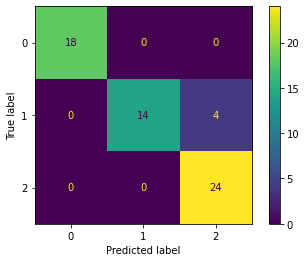

In [14]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(model, test_images, test_labels)

In [16]:
ypred = model.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)*100

93.33333333333333

# SVM

In [17]:
from sklearn import svm
svc = svm.SVC()
svc.fit(train_images, train_labels)

SVC()

d:\skhapijulhossen\deep-learning\RiceLeafCropDisease\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


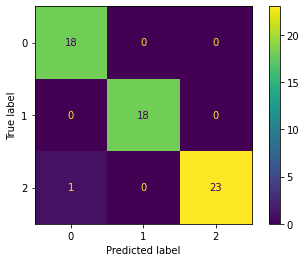

In [18]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svc, test_images, test_labels)

In [19]:
ypred = svc.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.9833333333333333

# Neural Network

In [27]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(100, 64, 10),
    random_state=42, verbose=2, max_iter=333)
nn.fit(train_images, train_labels)

Iteration 1, loss = 1.13321765
Iteration 2, loss = 1.11666506
Iteration 3, loss = 1.11157466
Iteration 4, loss = 1.10691491
Iteration 5, loss = 1.10252003
Iteration 6, loss = 1.09889827
Iteration 7, loss = 1.09535422
Iteration 8, loss = 1.09199388
Iteration 9, loss = 1.08905720
Iteration 10, loss = 1.08635847
Iteration 11, loss = 1.08351380
Iteration 12, loss = 1.08078538
Iteration 13, loss = 1.07843870
Iteration 14, loss = 1.07599175
Iteration 15, loss = 1.07330338
Iteration 16, loss = 1.07057383
Iteration 17, loss = 1.06783130
Iteration 18, loss = 1.06492252
Iteration 19, loss = 1.06183710
Iteration 20, loss = 1.05858035
Iteration 21, loss = 1.05493365
Iteration 22, loss = 1.05064041
Iteration 23, loss = 1.04600501
Iteration 24, loss = 1.04192957
Iteration 25, loss = 1.03793495
Iteration 26, loss = 1.03340443
Iteration 27, loss = 1.02849775
Iteration 28, loss = 1.02370270
Iteration 29, loss = 1.01856784
Iteration 30, loss = 1.01325150
Iteration 31, loss = 1.00791244
Iteration 32, los

d:\skhapijulhossen\deep-learning\RiceLeafCropDisease\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (333) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 64, 10),
              max_iter=333, random_state=42, verbose=2)

d:\skhapijulhossen\deep-learning\RiceLeafCropDisease\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


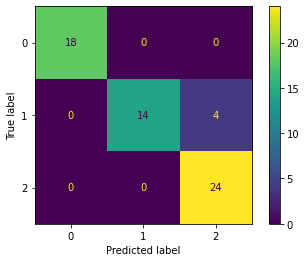

In [28]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(nn, test_images, test_labels)

In [29]:
ypred = nn.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.9333333333333333

In [31]:
from joblib import dump
dump(nn, 'CropDiseaseClassifier')

['CropDiseaseClassifier']